In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from math import *
import FlowCal as FC
from scipy.optimize import curve_fit
from scipy import stats
import seaborn as sns

In [2]:
def channel_median(facsdata_list,channel,flip_tag=True):
    channel_median=[]
    
    if flip_tag==True:
        for i in np.flip(np.arange(len(facsdata_list))):
            channel_median.append(np.median(facsdata_list[i][:,channel]))
    
    else:
        for i in np.arange(0,len(facsdata_list)):
            channel_median.append(np.median(facsdata_list[i][:,channel]))
        
    return np.array(channel_median)


In [3]:
path_0607='Exp_20200607_1/'
path_0613='Exp_20200613_1/'

In [4]:
gatefrac=0.8

# A3-A12
R_0607A_gated=[]
for i in range(3,13):
    tmp=FC.io.FCSData(path_0607+'05-Well-A'+str(i)+'.fcs')
    tmp_gated=FC.gate.density2d(tmp,channels=['FSC-A','SSC-A'],bins=1000,gate_fraction=gatefrac)
    R_0607A_gated.append(tmp_gated)

In [5]:
# processing flowcytometry raw data using density gating
gatefrac=0.8

# 04-Well A3-A12
R_0613A_gated=[]
for i in range(3,13):
    tmp=FC.io.FCSData(path_0613+'04-Well-A'+str(i)+'.fcs')
    tmp_gated=FC.gate.density2d(tmp,channels=['FSC-A','SSC-A'],bins=1000,gate_fraction=gatefrac)
    R_0613A_gated.append(tmp_gated)
    
    
# 04-Well B3-B12
R_0613B_gated=[]
for i in range(3,13):
    tmp=FC.io.FCSData(path_0613+'04-Well-B'+str(i)+'.fcs')
    tmp_gated=FC.gate.density2d(tmp,channels=['FSC-A','SSC-A'],bins=1000,gate_fraction=gatefrac)
    R_0613B_gated.append(tmp_gated)


In [10]:
R_0607A_gfp=[]
for i in range(0,len(R_0607A_gated)):
    data=R_0607A_gated[i][:,'FL1-A']
    ind=np.where(data>0)    
    R_0607A_gfp.append(data[ind])
R_0607A_gfp=np.array(R_0607A_gfp,dtype=object)


#------
R_0613A_gfp=[]
for i in range(0,len(R_0613A_gated)):
    data=R_0613A_gated[i][:,'FL1-A']
    ind=np.where(data>0)    
    R_0613A_gfp.append(data[ind])
R_0613A_gfp=np.array(R_0613A_gfp,dtype=object)

#------
R_0613B_gfp=[]
for i in range(0,len(R_0613B_gated)):
    data=R_0613B_gated[i][:,'FL1-A']
    ind=np.where(data>0)    
    R_0613B_gfp.append(data[ind])
R_0613B_gfp=np.array(R_0613B_gfp,dtype=object)

In [11]:
data_median=np.array([channel_median(R_0607A_gated,'FL1-A'),\
             channel_median(R_0613A_gated,'FL1-A'),\
             channel_median(R_0613B_gated,'FL1-A'),\
            ])
data_mean=np.mean(np.array(data_median),axis=0)
data_std=np.std(np.array(data_median),axis=0)
data_sem=stats.sem(np.array(data_median),axis=0)

bfp_median=np.array([channel_median(R_0607A_gated,'FL5-A'),\
             channel_median(R_0613A_gated,'FL5-A'),\
             channel_median(R_0613B_gated,'FL5-A'),\
            ])
bfp_mean=np.mean(np.array(bfp_median),axis=0)
bfp_std=np.std(np.array(bfp_median),axis=0)
bfp_sem=stats.sem(np.array(bfp_median),axis=0)

[]

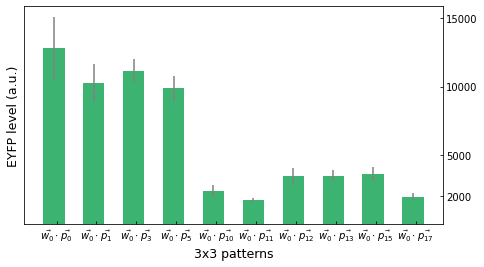

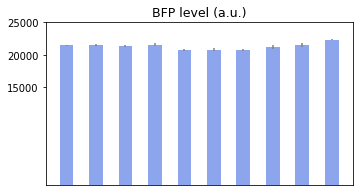

In [13]:
#labels=['$\\vec{w_0}\\cdot\\vec{p_0}$']

labels=[]
p_indx=[0,1,3,5,10,11,12,13,15,17]
for i in range(0,len(p_indx)):
    #labels.append('$\\vec{w_0}\\cdot\\vec{p'+str(p_indx[i])+'}$')
    labels.append('$\\vec{w_0}\\cdot\\vec{p_{'+str(p_indx[i])+'}}$')
x=np.arange(10)*1.5

fig, ax = plt.subplots(figsize=(7.5,4))
rect = ax.bar(x, data_mean, width=0.8,yerr=data_sem,color='mediumseagreen',ecolor='grey')
ax.set_xticks(x+0.1)
ax.yaxis.tick_right()
ax.set_xticklabels(labels,size=10)
ax.set_yticks([1.5e4, 1e4, 5e3, 2e3])
#--------
ax.set_ylabel('EYFP level (a.u.)',fontsize=12.5)
ax.set_xlabel('3x3 patterns',fontsize=12.5)
ax.tick_params(direction='in')

#plt.savefig('3x3-R.png',dpi=400)
#=========

fig, ax = plt.subplots(figsize=(5.5,3))
#ax1=ax.twinx()

rect=ax.bar(x,bfp_mean,width=0.7,yerr=bfp_sem,color='royalblue',ecolor='grey',alpha=0.6)
ax.set_title('BFP level (a.u.)',fontsize=12.5)
ax.set_yticks([2.5e4, 2e4, 1.5e4])
ax.set_xticks([])
#ax.yaxis.tick_right()

#plt.savefig('3x3-BFP.png',dpi=400)